In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
x_mean=[]
x_std=[]

In [2]:
def stand(a):
    return (a-np.mean(a))/np.std(a),np.mean(a),np.std(a)

In [3]:
df = pd.read_csv('loan-train.csv')

for col in range(6, 11):
    df.iloc[:, col] = pd.to_numeric(df.iloc[:, col], errors='coerce')

df.iloc[:, 6:10] = df.iloc[:, 6:10].fillna(df.iloc[:, 6:10].mean())

for col in range(6, 10):
    a_col = df.iloc[:, col].values 
    sce, a1, b1 = stand(a_col)
    df.iloc[:, col] = sce 
    x_mean.append(a1)
    x_std.append(b1)

k = df.iloc[:, 1:].values

C:\Users\satya\AppData\Local\Temp\ipykernel_14088\3671358801.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 7.29908229e-02 -1.34411954e-01 -3.93747337e-01 -4.62062470e-01
  9.77284368e-02  2.21831139e-03 -5.03018784e-01 -3.87849628e-01
 -2.28939128e-01  1.21845703e+00 -3.60982286e-01 -4.75659966e-01
 -3.81788093e-01 -5.81654908e-01 -6.72414101e-01 -7.42880841e-02
 -2.96107483e-01 -3.10196456e-01 -8.46090753e-02 -4.59277440e-01
  3.69678365e-01  9.03563002e-02 -4.59277440e-01 -3.33951118e-01
 -2.76284627e-01  6.80946355e-01 -4.26676214e-01 -1.92897571e-01
 -6.48987089e-01 -2.70878394e-01 -2.02727086e-01 -3.66388519e-01
 -1.16555001e-01 -3.11834708e-01  1.16259261e+00 -5.12520649e-01
 -5.85750540e-01 -2.84475890e-01 -2.02727086e-01 -2.71206044e-01
 -2.95452182e-01 -5.90337647e-01 -4.92042492e-01 -2.39587769e-01
 -1.16063525e-01 -3.26578981e-01  4.02257712e-02  6.84037156e-02
 -4.51905304e-01 -2.29922079e-01 -

In [4]:
print(k[2])

['Male' 'Yes' '0' 'Graduate' 'Yes' -0.3937473372051281 -0.5544873301529852
 -0.9576409986248737 0.27985054320228187 1.0 'Urban' 'Y']


In [5]:
from sklearn.impute  import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp.fit(k[:, 1:12])
k[:, 1:12] = imp.transform(k[:, 1:12])


In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
cols_to_encode = [0, 1, 2, 3, 4, 10, 11] 

for col in cols_to_encode:
    k[:, col] = le.fit_transform(k[:, col])
print(k)
print(k[5:10])

[[1 0 0 ... 1.0 2 1]
 [1 1 1 ... 1.0 0 0]
 [1 1 0 ... 1.0 2 1]
 ...
 [1 1 1 ... 1.0 2 1]
 [1 1 2 ... 1.0 2 1]
 [0 0 0 ... 0.0 1 0]]
[[1 1 2 0 1 0.0022183113925933404 0.8805997122641535 1.4360993952153702
  0.27985054320228187 1.0 2 1]
 [1 1 0 1 0 -0.5030187842943628 -0.03599544352181688 -0.612275469165336
  0.27985054320228187 1.0 2 1]
 [1 1 3 0 0 -0.38784962791695354 0.30191351689480206 0.13800137069503896
  0.27985054320228187 0.0 1 0]
 [1 1 2 0 0 -0.22893912765224944 -0.03257531234351103 0.25709293257763816
  0.27985054320228187 1.0 2 1]
 [1 1 1 0 0 1.2184570268205968 3.196712546212882 2.4126502026526837
  0.27985054320228187 1.0 1 0]]


In [7]:
x = k[:, :-1].astype('float')
y = k[:, -1].astype('float')
l=x.shape[0]
x_train=x[:int(0.6*l)]
x_val=x[int(0.6*l):int(0.8*l)]
x_test=x[int(0.8*l):]
y_train=y[:int(0.6*l):]
y_val = y[int(0.6*l):int(0.8*l)]
y_test=y[int(0.8*l):]
best_m=float('inf')
best_w=[]


In [8]:

def sf(z):
    return 1 / (1 + np.exp(-z))
def hf(w, x):
    return sf(x.dot(w)) >= 0.5  

def mse(h, y):
    ep = 1e-5  
    m1 = y.shape[0]
    return -(1 / m1) * (y.T.dot(np.log(h + ep)) + (1 - y).T.dot(np.log(1 - h + ep)))

def batch_gr(x, y,x_v,y_v ,epoch,l):
    m = np.shape(x)[0]
    x = np.c_[np.ones(m), x]  
    w = np.ones(np.shape(x)[1])  
    for i in range(epoch):
        h = sf(x.dot(w)) 
        e = h - y  
        gr = (1 / m) * (x.T.dot(e))  
        w -= l * gr
    x_v=np.c_[np.ones(x_v.shape[0]),x_v]  
    bb=sf(x_v.dot(w))
    val_mse=mse(bb,y_v)
    return w,val_mse

In [9]:
for epoch in [1000,5000,10000,100000,500000]:
    for l in [0.01,0.05,0.001]:
        w,v_mse=batch_gr(x_train, y_train,x_val,y_val,epoch,l)
        if v_mse<best_m:
            best_m=v_mse
            best_w=w

x_t = np.c_[np.ones(x_test.shape[0]), x_test]  
h1 = sf(x_t.dot(best_w))  

print(mse(h1, y_test))

0.5173011543228366


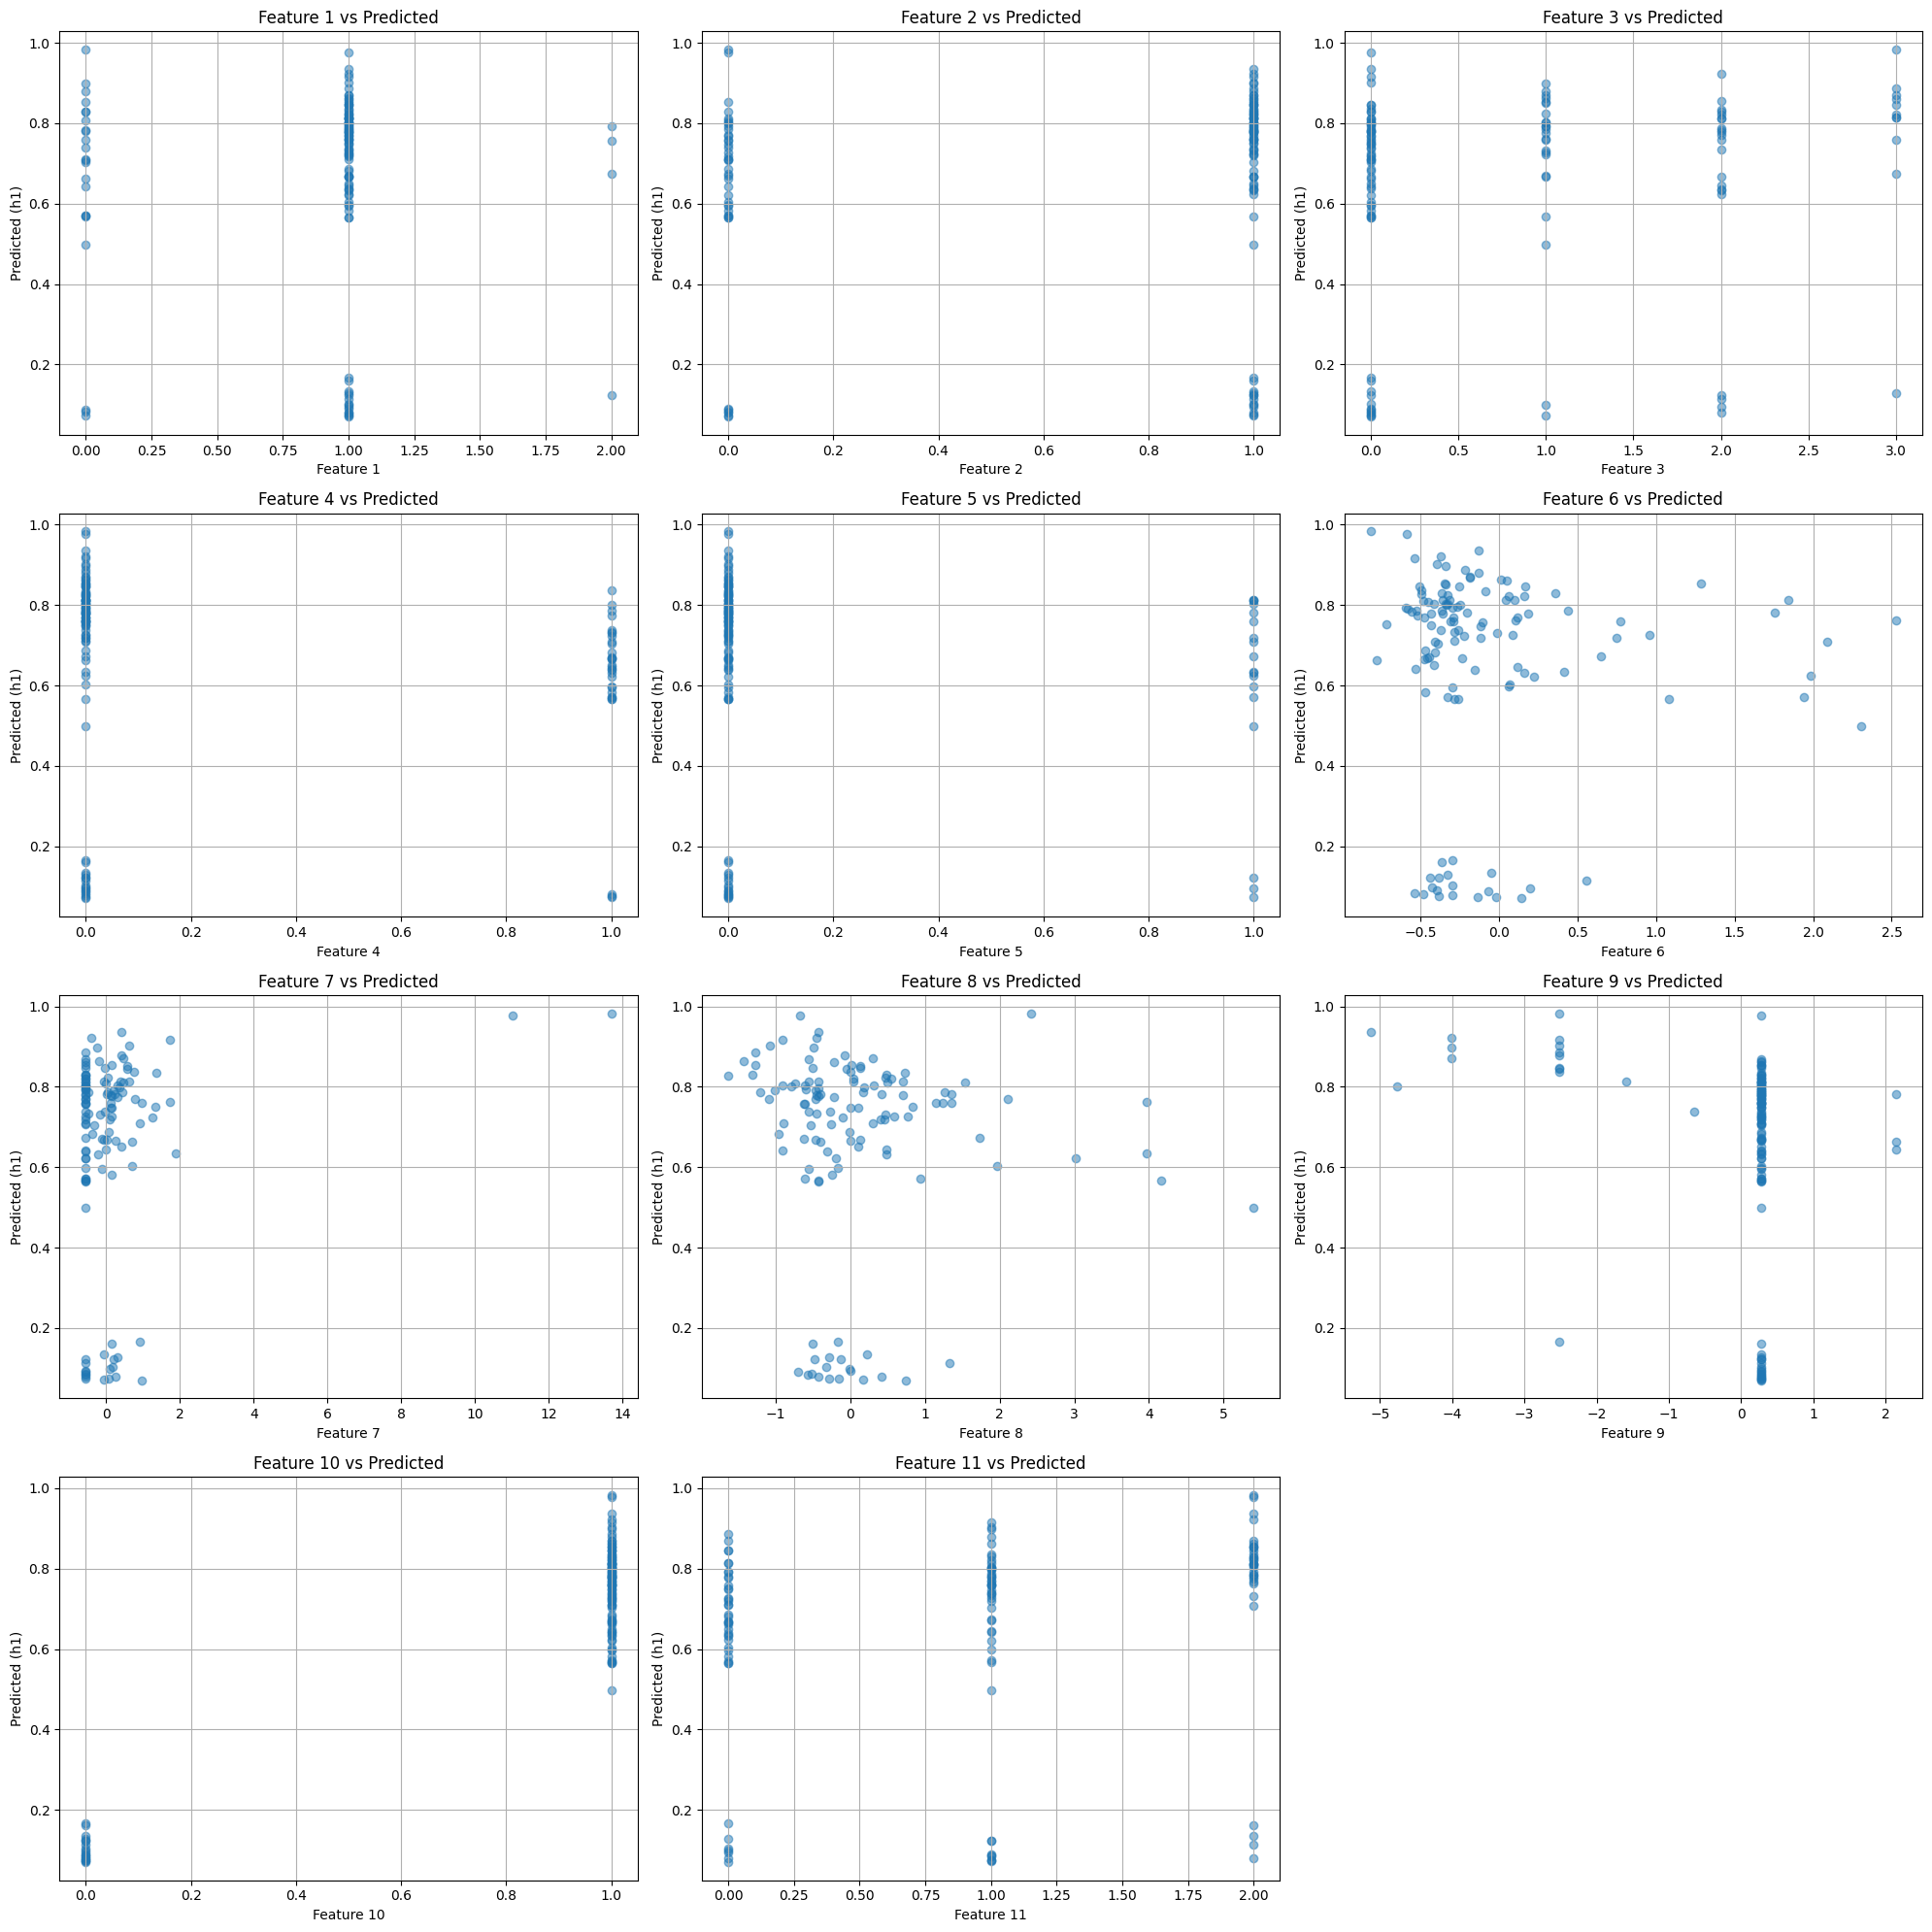

In [10]:

import math

num_features = x_test.shape[1] 

rows = math.ceil(num_features / 3)  
plt.figure(figsize=(20, rows * 5))  

for i in range(num_features):
    plt.subplot(rows, 3, i + 1)  
    plt.scatter(x_test[:, i], h1, alpha=0.5)
    plt.title(f"Feature {i+1} vs Predicted")
    plt.xlabel(f"Feature {i+1}")
    plt.ylabel("Predicted (h1)")
    plt.grid(True)

plt.tight_layout()  
plt.show()


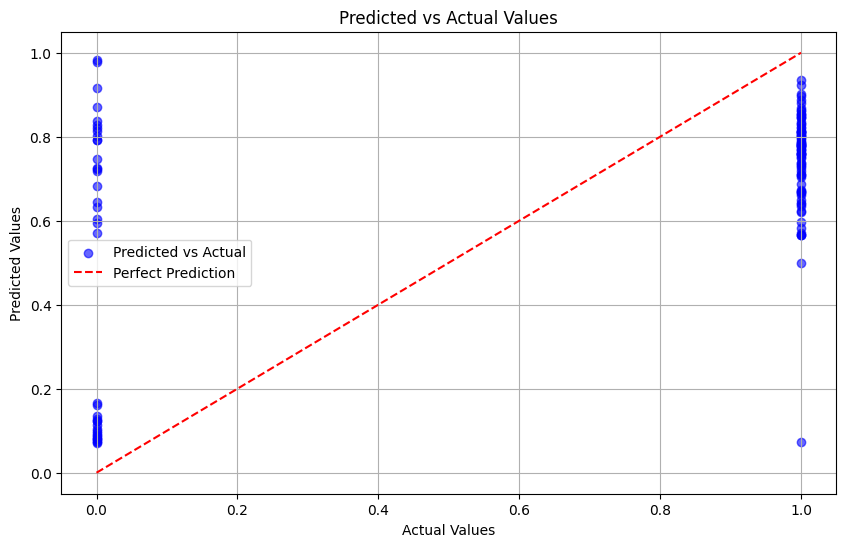

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, h1, color='blue', alpha=0.6, label='Predicted vs Actual')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

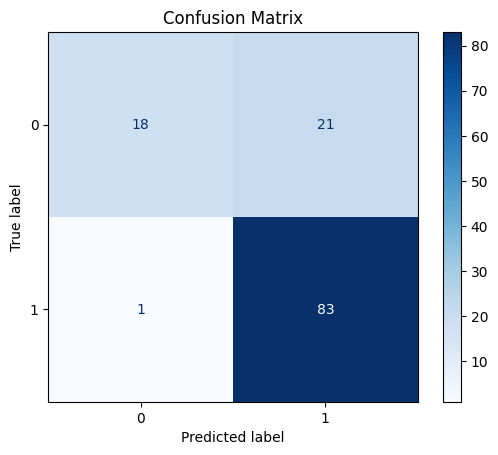

Accuracy: 0.8211382113821138
Recall: 0.9880952380952381


In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, recall_score

x_t = np.c_[np.ones(x_test.shape[0]), x_test] 
h1 = sf(x_t.dot(w))  

y_pred = (h1 >= 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
    

Random Forest Test Accuracy: 0.8130081300813008
Random Forest Recall: 0.9523809523809523
Best Random Forest Parameters: {'n_estimators': 100, 'max_depth': 10}
Logistic Regression outperforms Random Forest


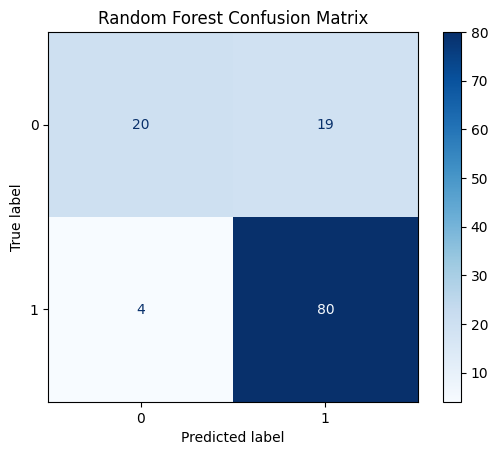

Logistic Regression Accuracy: 0.8211382113821138
Random Forest Accuracy: 0.8130081300813008


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score


best_rf_accuracy = 0
best_rf_params = None
best_rf_model = None


n_estimators_options = [50, 100, 200]
max_depth_options = [None, 10, 20]


for n_estimators in n_estimators_options:
    for max_depth in max_depth_options:
        
        rf_model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        rf_model.fit(x_train, y_train)

        
        y_rf_val_pred = rf_model.predict(x_val)
        rf_accuracy = accuracy_score(y_val, y_rf_val_pred)

        
        if rf_accuracy > best_rf_accuracy:
            best_rf_accuracy = rf_accuracy
            best_rf_params = {'n_estimators': n_estimators, 'max_depth': max_depth}
            best_rf_model = rf_model


y_rf_test_pred = best_rf_model.predict(x_test)
rf_test_accuracy = accuracy_score(y_test, y_rf_test_pred)
rf_recall = recall_score(y_test, y_rf_test_pred)


print(f"Random Forest Test Accuracy: {rf_test_accuracy}")
print(f"Random Forest Recall: {rf_recall}")
print(f"Best Random Forest Parameters: {best_rf_params}")


if rf_test_accuracy > accuracy:
    print("Random Forest outperforms Logistic Regression")
    best_w = best_rf_model
else:
    print("Logistic Regression outperforms Random Forest")
    best_w = best_w  


rf_cm = confusion_matrix(y_test, y_rf_test_pred)
rf_disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm)
rf_disp.plot(cmap=plt.cm.Blues)
plt.title("Random Forest Confusion Matrix")
plt.show()


print(f"Logistic Regression Accuracy: {accuracy}")
print(f"Random Forest Accuracy: {rf_test_accuracy}")


In [14]:
xam=["Female","Yes",'0',"Graduate",'No'	,3667,1459,	144,360,1,'Semiurban','Y']

for i in range(len(xam)):
    if i==0:
        if  xam[i]=="Male":
            xam[i]=1
        else:
            xam[i]=0
    if i==2:
        if  xam[i]=="0" or xam[i]==0 :
            xam[i]==0
        elif xam[i]=="1" or xam[i]==1:
            xam[i]==1
        elif xam[i]=="2" or xam[i]==2:
            xam[i]==2
        else:
            xam[i]==3

    if i==1:
        if  i==1 and xam[i]=="Yes":
            xam[i]=1
        else:
            xam[i]=0
    if i==3:
        if  xam[i]=="Graduate":
            xam[i]=1
        else:
            xam[i]=0
    if i==4:
        if  xam[i]=="Yes":
            xam[i]=1
        else:
            xam[i]=0
    if  i==5 :
        xam[i]=(xam[i]-x_mean[0])/x_std[0]
    if  i==6 :
        xam[i]=(xam[i]-x_mean[1])/x_std[1]
    if  i==7:
        xam[i]=(xam[i]-x_mean[2])/x_std[2]
    if  i==8 :
        xam[i]=(xam[i]-x_mean[3])/x_std[3]
    if i==10:
        if  xam[i]=="Semiurban":
            xam[i]=1
        elif xam[i]=="Urban":
            xam[i]=2
        else:
            xam[i]=0
    if i==9:
        if  xam[i]=="0" or xam[i]==0 :
            xam[i]==0
        elif xam[i]=="1" or xam[i]==1:
            xam[i]==1
        else:
            xam[i]==3
    if i==11:
        if  xam[i]=="Y":
            xam[i]=1
        else:
            xam[i]=0
import pickle
if rf_test_accuracy < accuracy:
    xam=np.array(xam,dtype=float).reshape(-1,1)
    print(hf(best_w,xam.T))
    with open('C:\\Users\\satya\\OneDrive\\Documents\\ml_project\\website\\models\\other_loan.pkl', 'wb') as f:
        pickle.dump(best_w, f)
   
else:
    xam_array = np.array(xam).reshape(1, -1)

    rf_prediction = best_rf_model.predict(xam_array)

    print("True") if rf_prediction[0]==1 else print("False")
    with open('C:\\Users\\satya\\OneDrive\\Documents\\ml_project\\website\\models\\other_loan.pkl', 'wb') as f:
        pickle.dump(best_rf_model, f)
scaling_params = {'x_mean': x_mean, 'x_std': x_std}
with open('C:\\Users\\satya\\OneDrive\\Documents\\ml_project\\website\\models\\scaling_params.pkl', 'wb') as f:
    pickle.dump(scaling_params, f)

[ True]
